In [373]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [126]:
df = pd.read_csv("zomato.csv")

In [127]:
pd.set_option('display.max_columns',3000)
pd.set_option('display.max_rows',3000)
pd.set_option('display.width',3000)

In [167]:
df.head(3)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [168]:
df.describe()

,rate,votes,cost
count,41237.000000,41237.000000,41237.000000
mean,3.702030,352.772001,603.911681
std,0.440034,884.409230,464.942234
min,1.800000,0.000000,40.000000
25%,3.400000,21.000000,300.000000
50%,3.700000,73.000000,500.000000
75%,4.000000,277.000000,750.000000
max,4.900000,16832.000000,6000.000000


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41237 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          41237 non-null  object 
 1   name             41237 non-null  object 
 2   online_order     41237 non-null  object 
 3   book_table       41237 non-null  object 
 4   rate             41237 non-null  float64
 5   votes            41237 non-null  int64  
 6   location         41237 non-null  object 
 7   rest_type        41237 non-null  object 
 8   cuisines         41237 non-null  object 
 9   cost             41237 non-null  int32  
 10  reviews_list     41237 non-null  object 
 11  menu_item        41237 non-null  object 
 12  listed_in(type)  41237 non-null  object 
 13  listed_in(city)  41237 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(11)
memory usage: 4.6+ MB


In [128]:
df = df.drop(['url','dish_liked','phone'],axis=1)

In [129]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.head(5)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [146]:
df.shape

(41237, 15)

In [130]:
df.isnull().sum()
df = df.dropna(axis=0, subset=['location','rest_type','cuisines','approx_cost(for two people)'])

In [131]:
df=df.dropna()

In [110]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type', 'cuisines', 'cost', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'], dtype='object')

In [183]:
df = df.rename(columns= {'approx_cost(for two people)' : 'cost'})
df = df.rename(columns= {'listed_in(type)' : 'type'})
df = df.rename(columns= {'listed_in(city)' : 'city'})

In [133]:
#df['str']=df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',',''))
df['cost'] = df['cost'].astype(int)

In [134]:
df['cost'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130, 1700, 1400, 1350, 2200,
       2000, 1800, 1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,
         40, 1250, 3500, 4000, 2400, 2600, 1450,   70, 3200,  560,  240,
        360, 6000, 1050, 2300, 4100,  120, 5000, 3700, 1650, 2700, 4500])

In [141]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [140]:
#df['rate'] = df['rate'].astype(str)
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-']

#df['rate'] = df['rate'].str.split('/').str[0]

In [152]:
df['rate'] = df['rate'].astype('float')
df.reset_index(inplace=True,drop=True)

In [159]:
df['name'] = df['name'].str.title()
df['online_order'] = df['online_order'].replace(('Yes','No'),(True,False))
df['book_table'] = df['book_table'].replace(('Yes','No'),(True,False))


0                                                    Jalsa
1                                           Spice Elephant
2                                          San Churro Cafe
3                                    Addhuri Udupi Bhojana
4                                            Grand Village
                               ...                        
41232                           The Farm House Bar N Grill
41233                                              Bhagini
41234    Best Brews - Four Points By Sheraton Bengaluru...
41235    Chime - Sheraton Grand Bengaluru Whitefield Ho...
41236                         The Nest - The Den Bengaluru
Name: name, Length: 41237, dtype: object

In [162]:
df['cost'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199, 1100, 1600,  230,  130, 1700, 1350, 2200, 1400, 2000, 1800,
       1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,   40, 1250,
       3500, 4000, 2400, 2600, 1450,   70, 3200,  240, 6000, 1050, 2300,
       4100,  120, 5000, 3700, 1650, 2700, 4500,   80])

In [185]:
def fact(df):
    for i in df.columns[~df.columns. isin(['cost','rate','votes'])]:
        df[i] = df[i].factorize()[0]
    return df

df_en = fact(df.copy())
df_en.head(10)


,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600,4,0,0,0
5,5,5,0,1,3.8,286,1,0,5,600,5,0,0,0
6,6,6,1,1,3.6,8,2,0,6,800,6,0,0,0
7,7,7,0,0,4.6,2556,0,3,7,600,7,0,1,0
8,8,8,0,1,4.0,324,0,4,8,700,8,0,1,0
9,9,9,0,1,4.2,504,0,4,9,550,9,0,1,0


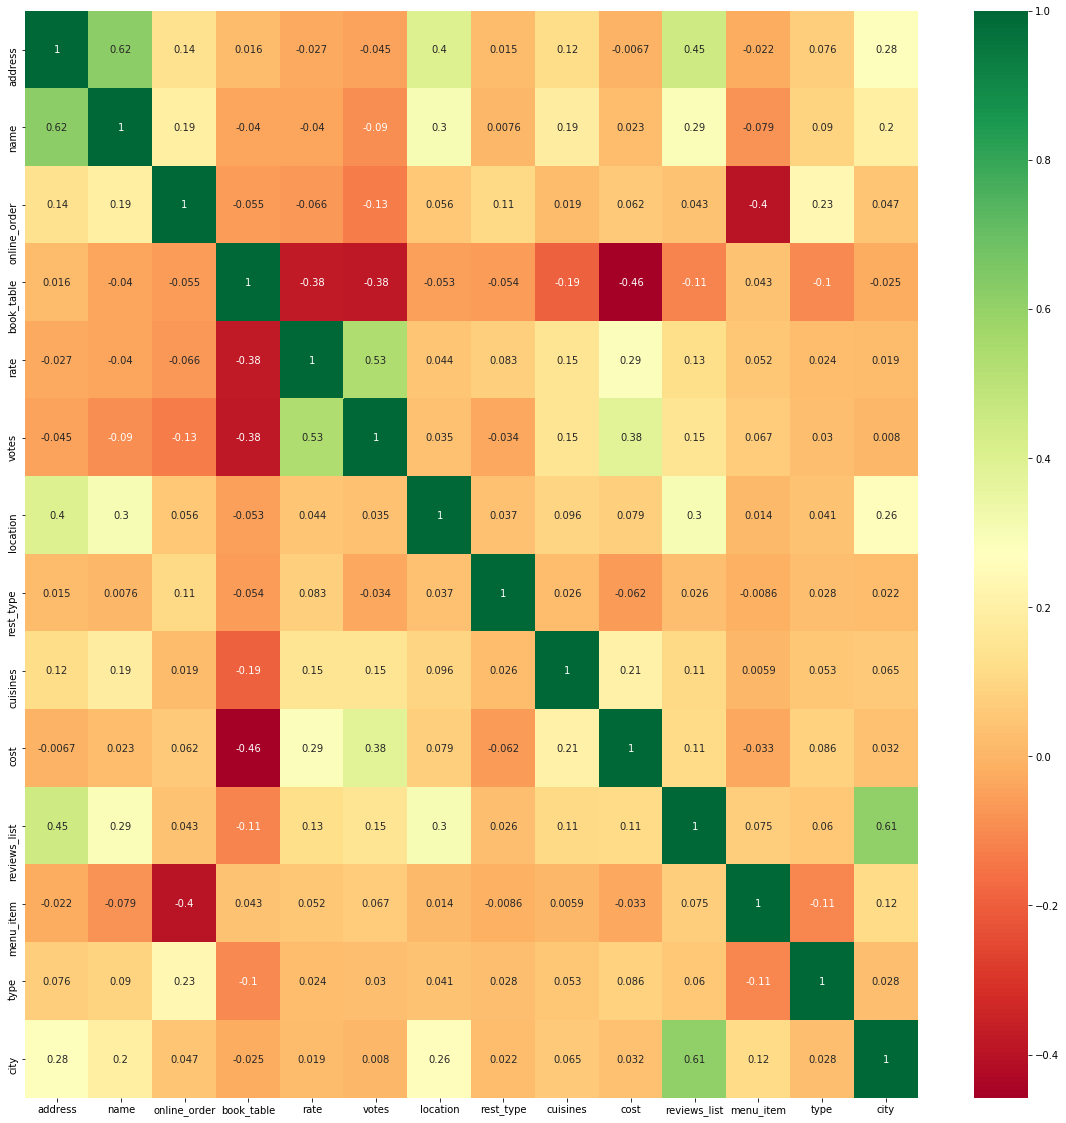

In [192]:
corr = df_en.corr(method="kendall")
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap="RdYlGn" ,annot=True)

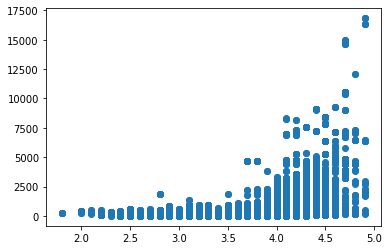

In [196]:
plt.scatter(x=df_en['rate'],y=df_en['votes'])

### REGRESSION ANALYSIS

In [357]:
y = df_en['rate']
x = df_en.drop('rate',axis=1)

In [358]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0, test_size =0.3)

### DATA_VISUALIZATION

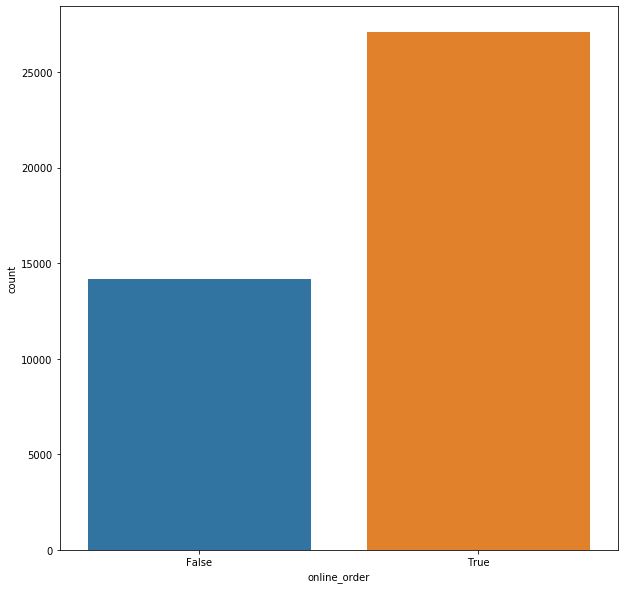

In [216]:
plt.figure(figsize=(10,10))
sns.countplot(df['online_order'])

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

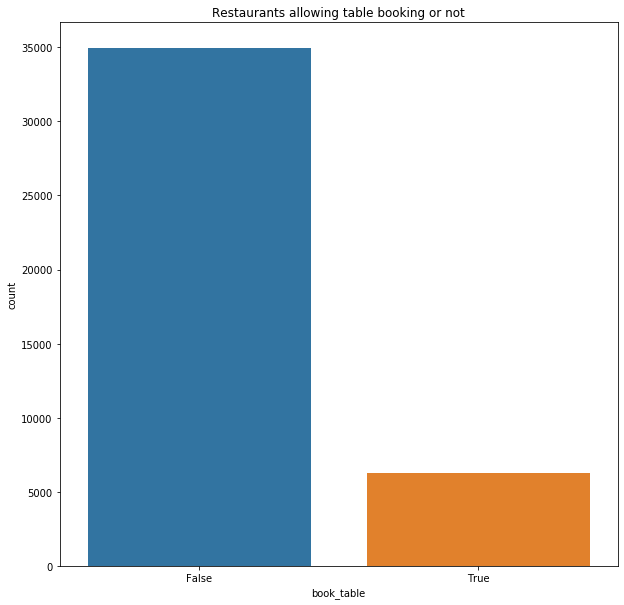

In [217]:
sns.countplot(df['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants allowing table booking or not')

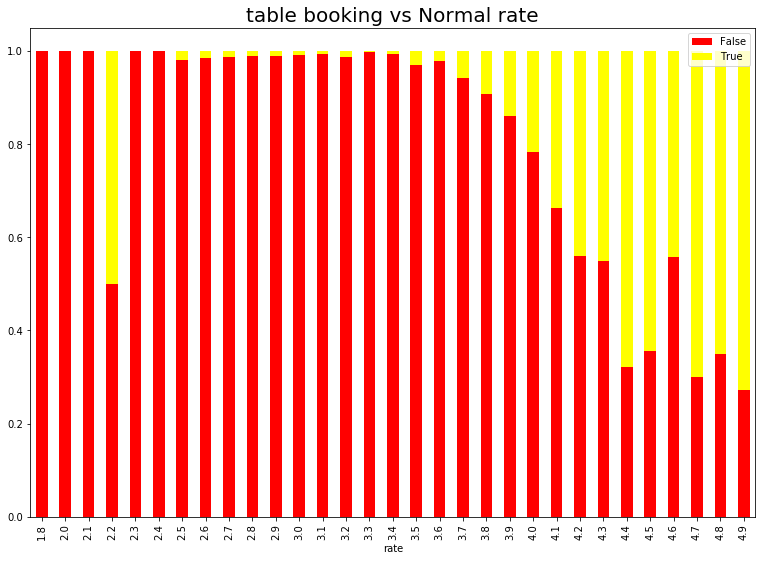

In [243]:
plt.rcParams['figure.figsize'] = (13, 9)
y= pd.crosstab(df['rate'], df['book_table'])
y.div(y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs Normal rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")

### LOCATION


Text(0.5, 1.0, 'Location wise count for restaurants')

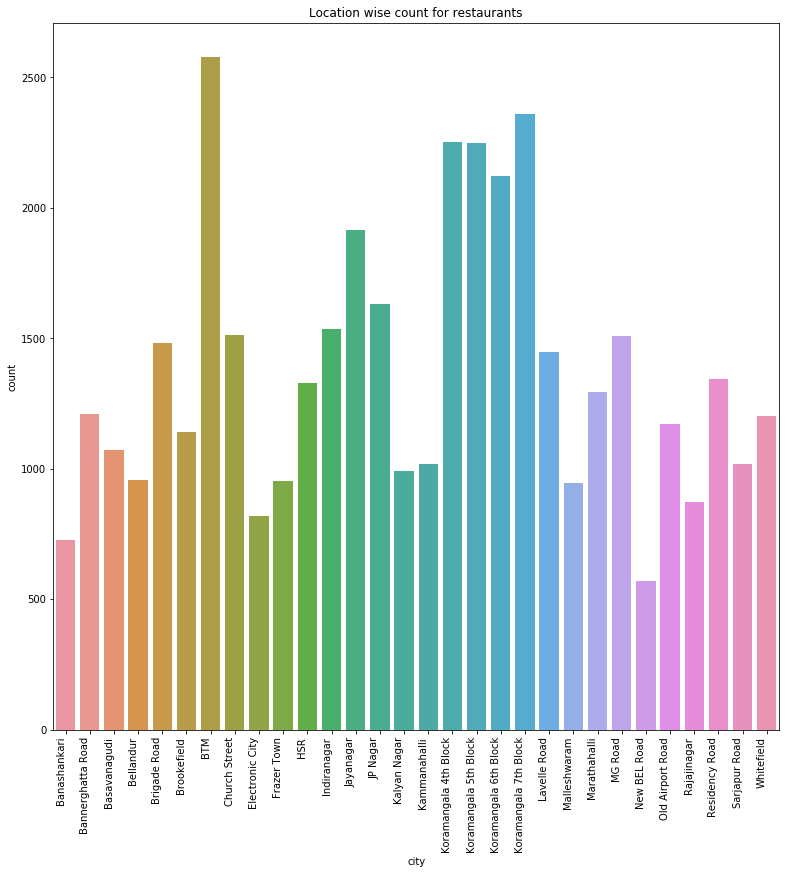

In [283]:
sns.countplot(df['city'])
sns.countplot(df['city']).set_xticklabels(sns.countplot(df['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Location wise count for restaurants')

### LOCATION AND RATING

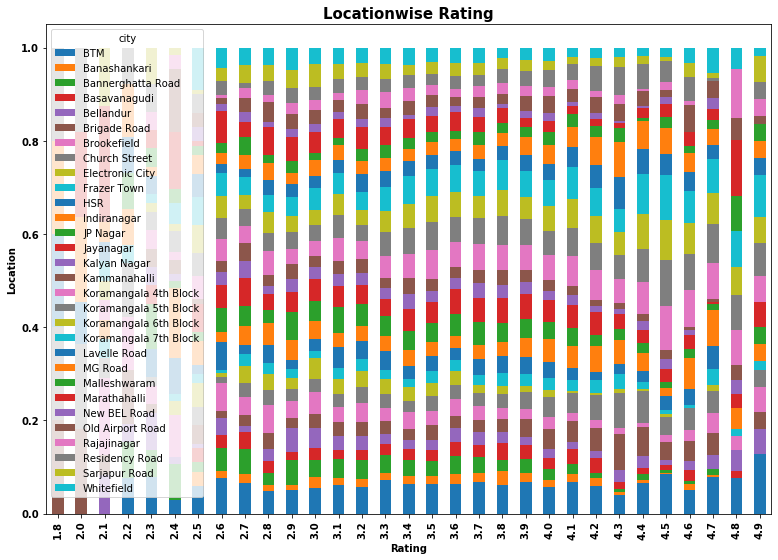

In [294]:
loc_cross = pd.crosstab(df['rate'],df['city'])
loc_cross.div(loc_cross.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
#loc_cross.plot(kind='bar',stacked=True)
plt.title('Locationwise Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');



### RESTAURANT TYPE

Text(0.5, 1.0, 'Restuarant Type')

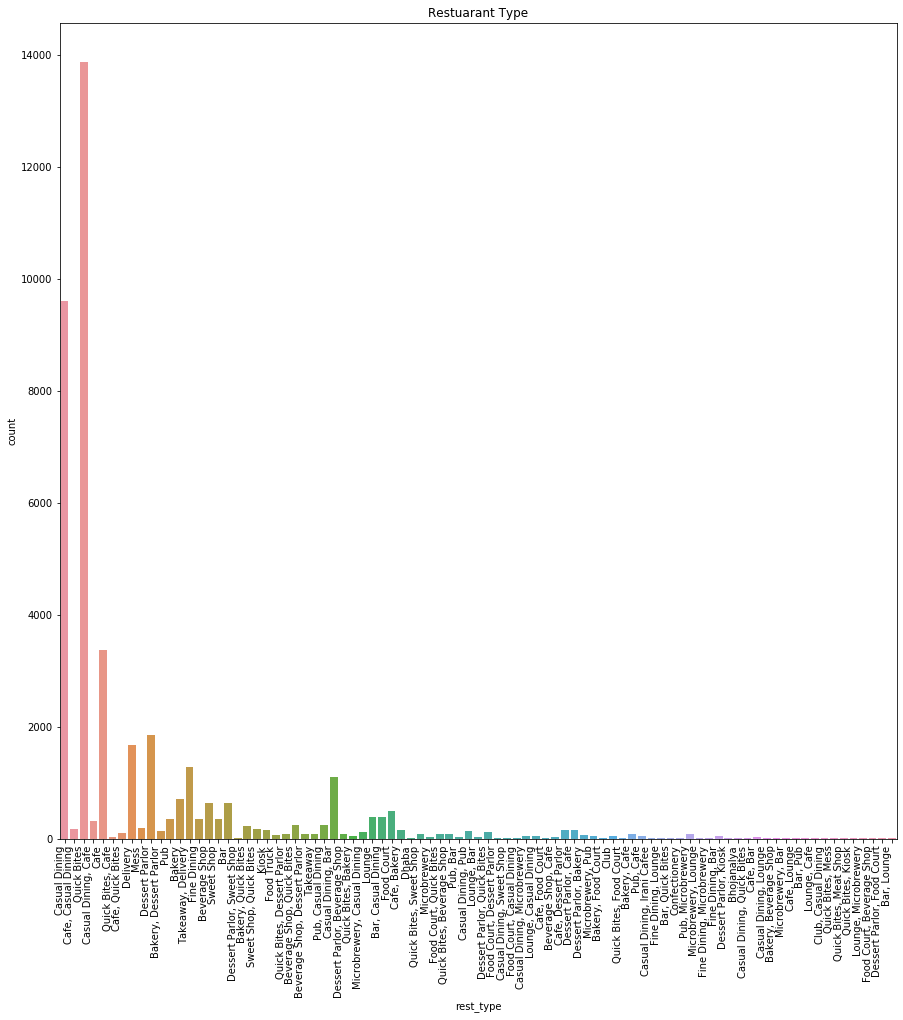

In [297]:
sns.countplot(df['rest_type'])
sns.countplot(df['rest_type']).set_xticklabels(sns.countplot(df['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Restuarant Type')

### GAUSSIAN REST TYPE AND RATING

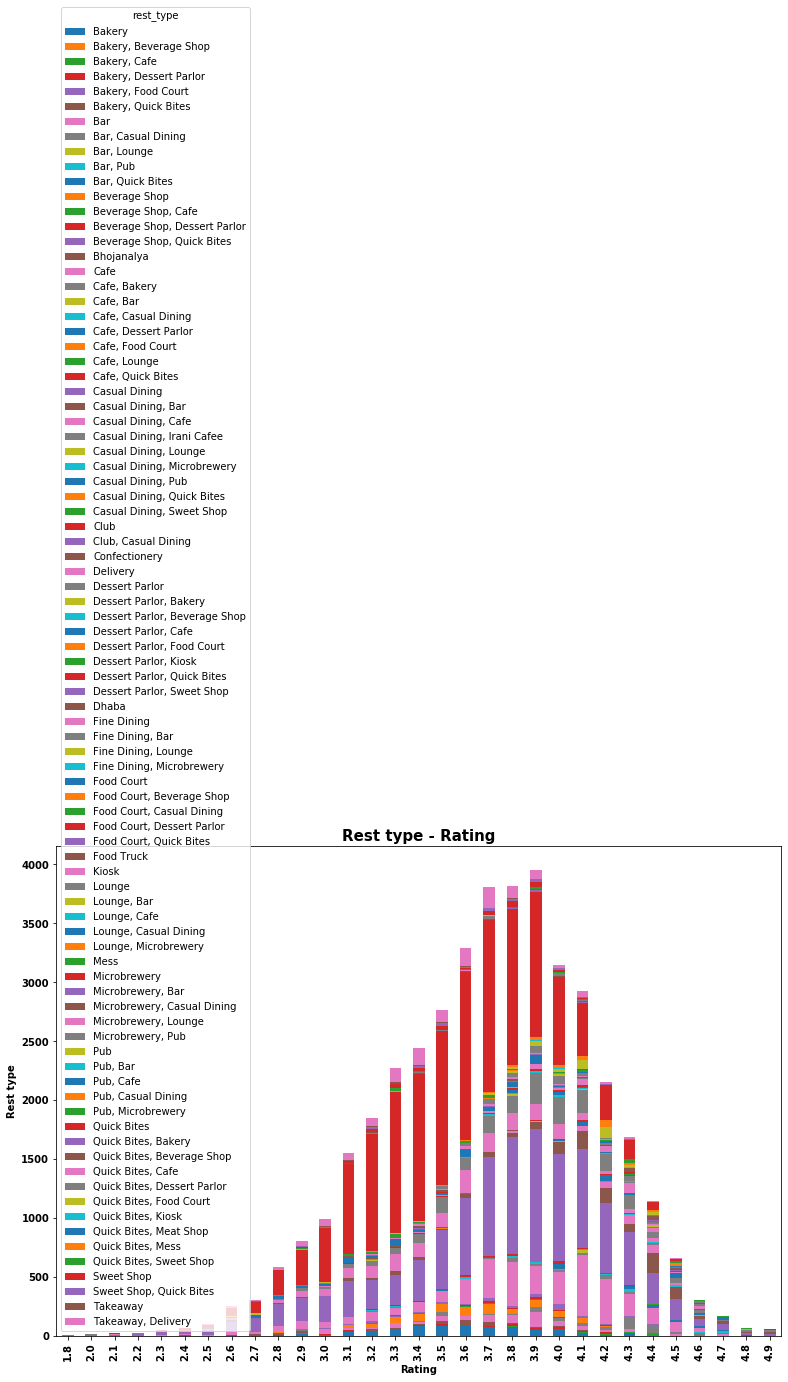

In [300]:
loc_plt=pd.crosstab(df['rate'],df['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');


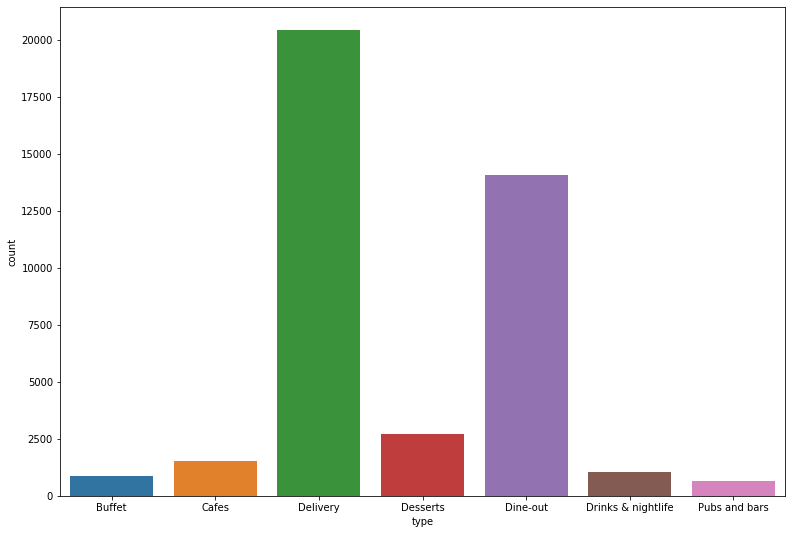

In [302]:
pd.value_counts(df['type'])
sns.countplot(df['type'])

### TYPE AND RATING

In [306]:
type_cross = pd.crosstab(df['rate'],df['type'])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

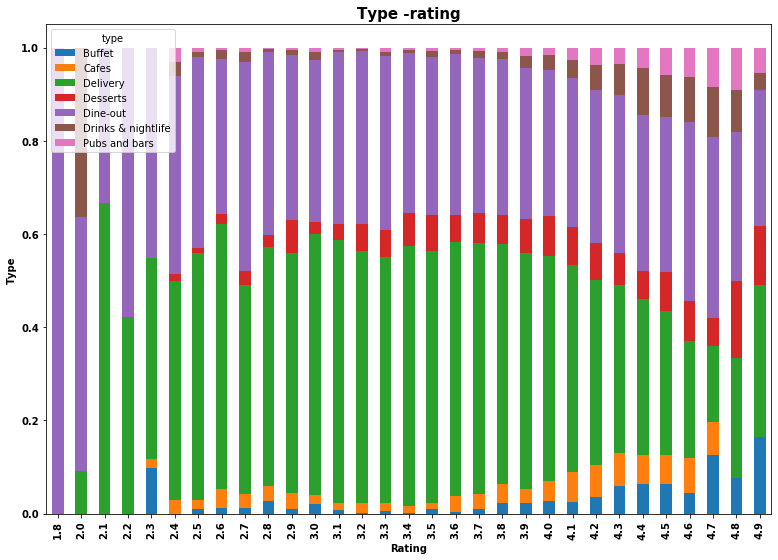

In [309]:
type_cross.div(type_cross.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.title("Type -rating", fontsize=15,fontweight='bold')
plt.xlabel("Rating", fontsize=10,fontweight='bold')
plt.ylabel("Type", fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')



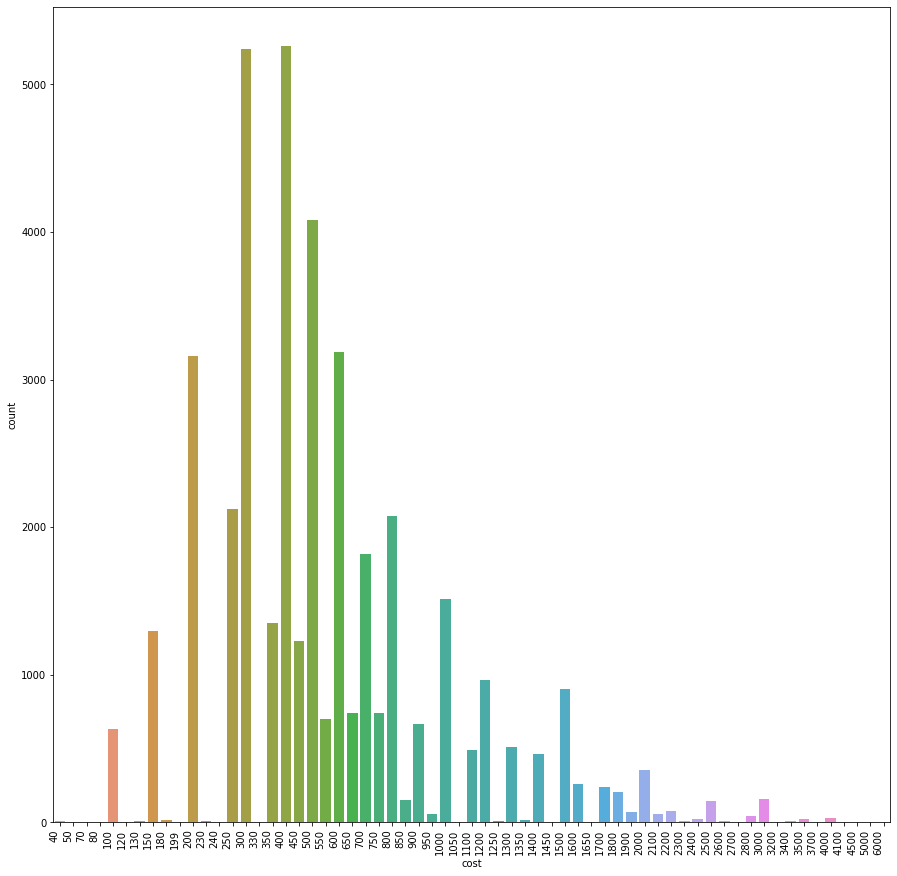

In [316]:
#pd.value_counts(df['cost'])

sns.countplot(df['cost'])
sns.countplot(df['cost']).set_xticklabels(sns.countplot(df['cost']).get_xticklabels(),rotation=90,ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)

In [319]:
pd.value_counts(df['location'])

BTM                              3873
Koramangala 5th Block            2296
HSR                              1993
Indiranagar                      1800
JP Nagar                         1710
Jayanagar                        1634
Whitefield                       1568
Marathahalli                     1410
Bannerghatta Road                1226
Koramangala 7th Block            1055
Koramangala 6th Block            1052
Brigade Road                     1052
Bellandur                         997
Sarjapur Road                     854
Koramangala 1st Block             851
Ulsoor                            846
Koramangala 4th Block             841
Electronic City                   832
MG Road                           793
Banashankari                      744
Kalyan Nagar                      692
Malleshwaram                      641
Richmond Road                     604
Residency Road                    603
Basavanagudi                      595
Frazer Town                       564
Church Stree

### No of Restaurant in a location

Text(0.5, 1.0, 'NO. of restaurants in a Location')

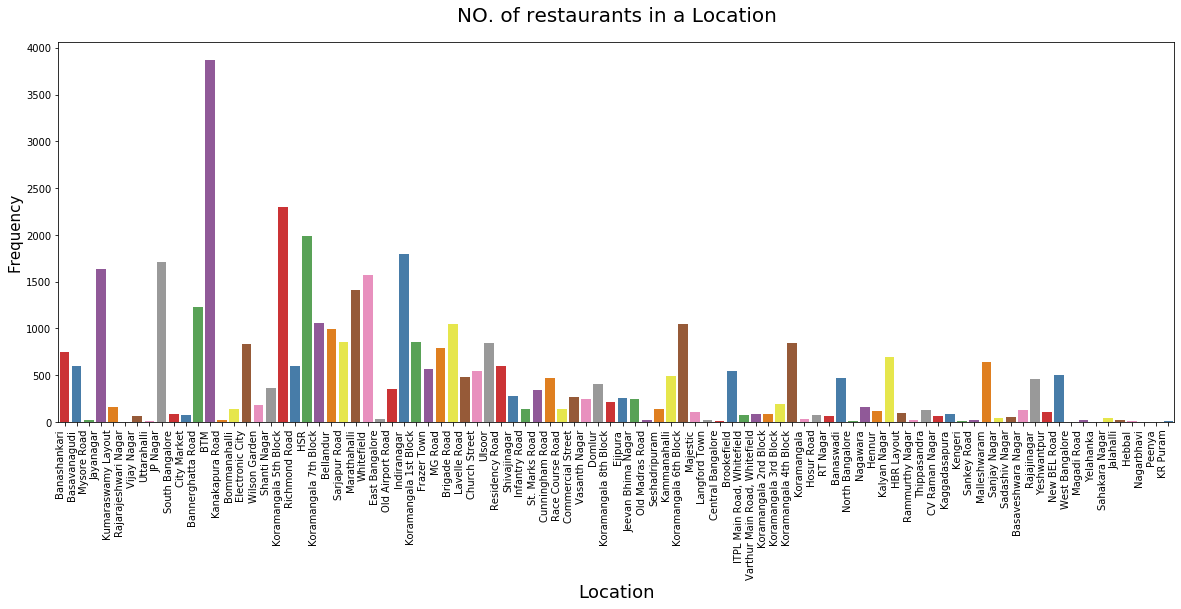

In [321]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=df, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)

plt.title('NO. of restaurants in a Location',size = 20,pad=20)

### Most famous Restaurant chains in Bengaluru

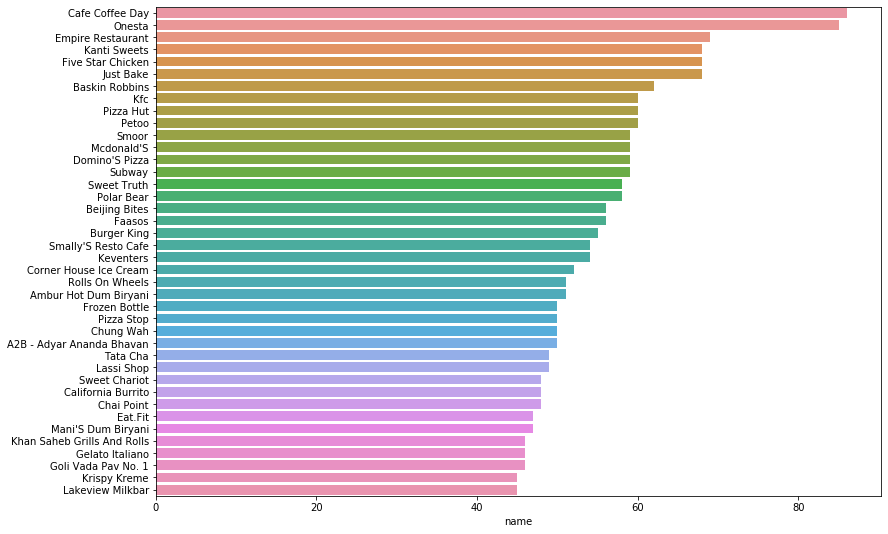

In [331]:
#da = pd.value_counts(df['name']).nlargest(40)
sns.barplot(y=da.index, x= da)

### LINEAR REGRESSION

In [362]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
print("R2 score",r2_score(y_test,y_pred))
print("rmse is {}".format(metrics.mean_squared_error(y_test,y_pred)))

R2 score 0.3122044978947164
rmse is 0.1315688159142731


In [368]:
#Prepairng a Decision Tree Regression
#from sklearn.tree import DecisionTreeRegressor
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
print("r2 score ", r2_score(y_test,y_predict))
print("rmse is {}".format(metrics.mean_squared_error(y_test,y_predict)))

r2 score  0.8157983660959494
rmse is 0.03523604150950174


In [372]:
#Preparing Random Forest REgression
#from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict_ran=RForest.predict(x_test)
print("r2 score ",r2_score(y_test,y_predict))
print("rmse is {}".format(metrics.mean_squared_error(y_test,y_predict_ran)))

rmse is 0.023273042079246572


In [374]:
#Preparing Extra Tree Regression
#from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict_extra=ETree.predict(x_test)
print("r2 score ",r2_score(y_test,y_predict))
print("rmse is {}".format(metrics.mean_squared_error(y_test,y_predict_extra)))


rmse is 0.016526309731652117


In [ ]:
import pickle
# Saving model to disk
pickle.dump(ETree, open('model.pkl','wb'))